In [1]:
import os
import xml.etree.ElementTree as et
import re
from collections import Counter
import pandas as pd

In [2]:
dir = 'Annotations'

modalities = ['text-flow','static-image','dynamic-image-flow','dynamic-text','scroll','button']
rows = []

for xml_file in os.listdir(dir):
    
    if re.search( r'xml$' , xml_file ):
        data = dict()
        screens = []
        
        try:
            path = os.path.join(dir,xml_file)
            annotation = et.parse(path) 
            article = annotation.getroot() 
            year = article.attrib['year']

            for screen in article: 
                modality = screen.attrib['mode']
                screens.append(modality)

            screens_freq = Counter(screens)

            for m in modalities:
                data[m] = screens_freq.get(m,0)

            data['year'] = year
            rows.append(data)
        
        except:
            print(f'Problem for {xml_file}')

df = pd.DataFrame(rows,columns= ['year']+modalities)

Problem for coronavirus-trump-reopen-america.xml?action=click&module=Opinion&pgtype=Homepage.xml
Problem for covid-19-vaccine-timeline.xml?action=click&module=Opinion&pgtype=Homepage.xml


In [3]:
rows = []

years = df['year'].unique()

for year in sorted(years):
    row = []
    row.append(year)
    print(year)
    total = 0 
    df_year = df.query( "year== '{}' ".format(year) )
    for m in modalities:
        row.append(df_year[m].sum())
        total += df_year[m].sum()
    row.append(total)
    row.append(df_year.shape[0])
    rows.append(row)

    
columns= ['year']+modalities + ['total','nr_articles']   
df_modalities = pd.DataFrame(rows, columns=columns )

2014
2015
2016
2017
2018
2019
2020
2021
2022


In [4]:
for m in modalities:
    column_name = m + '_percentage'
    df_modalities[column_name] = df_modalities[m] / df_modalities['total']
    
for m in modalities:
    column_name = m + '_per_article'
    df_modalities[column_name] = df_modalities[m] / df_modalities['nr_articles']

In [13]:
for column in df_modalities.columns:
    print(column)

year
text-flow
static-image
dynamic-image-flow
dynamic-text
scroll
button
total
nr_articles
text-flow_percentage
static-image_percentage
dynamic-image-flow_percentage
dynamic-text_percentage
scroll_percentage
button_percentage
text-flow_per_article
static-image_per_article
dynamic-image-flow_per_article
dynamic-text_per_article
scroll_per_article
button_per_article


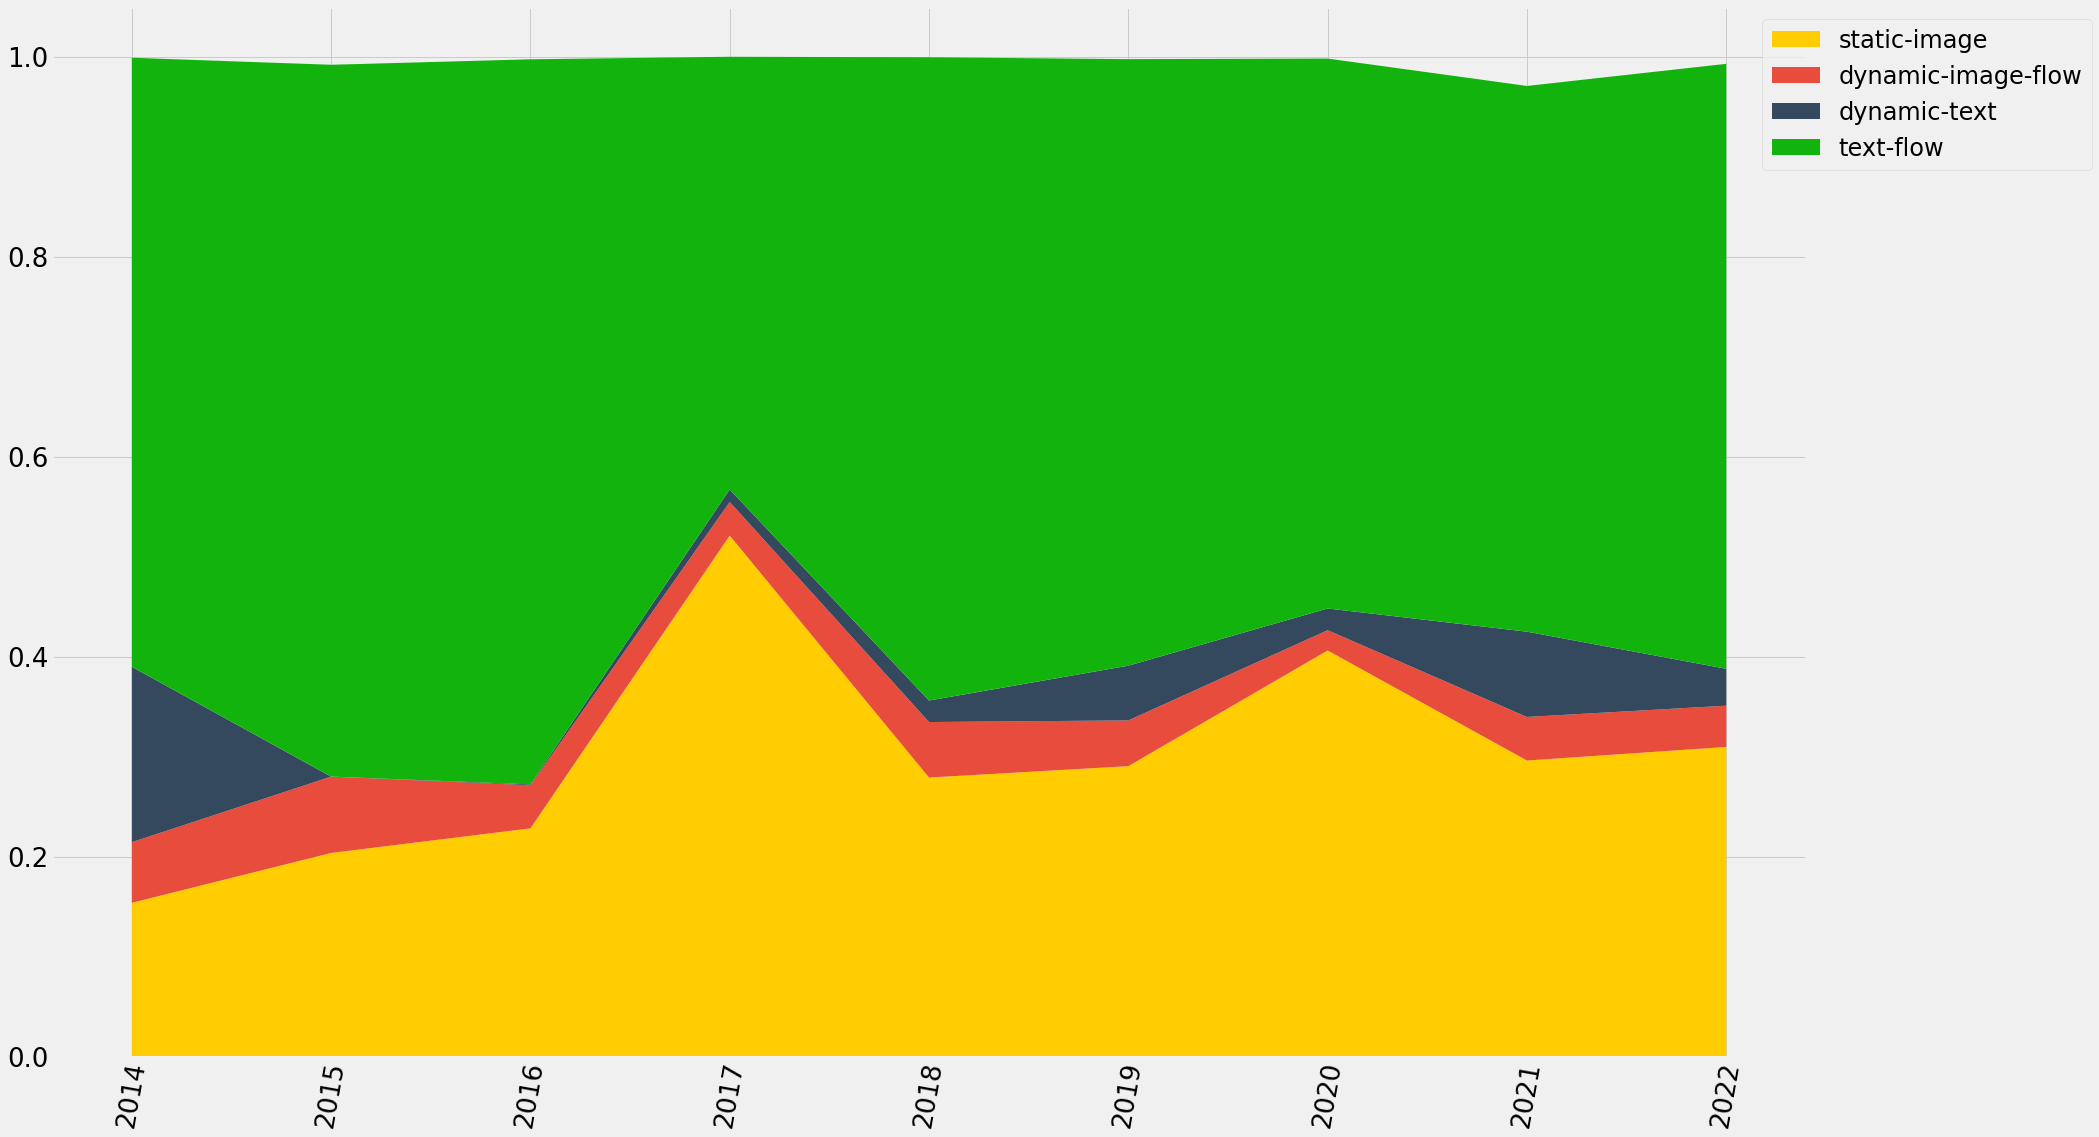

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize = (28,18) )
plt.style.use('fivethirtyeight')

# reset the plot configurations to default
color_map = ["FFCD01", "#e74c3c","#34495e", "#12b30c", "#0099AA","#FFAA88", "#19d138", "#9b59b6"]


plt.stackplot( df_modalities['year'] , 

    df_modalities['static-image_percentage'],
        df_modalities['dynamic-image-flow_percentage'],
        df_modalities['dynamic-text_percentage'] , 
              
                 df_modalities['text-flow_percentage'], labels = [ 'static-image', 'dynamic-image-flow','dynamic-text', 'text-flow'] , colors = color_map  )

plt.legend( loc='upper right' , prop={ 'size':24} , bbox_to_anchor=(1.17, 1.0) )


#add axis labels


plt.xticks(rotation= 80 , fontsize= 26)
plt.yticks(fontsize= 26)

plt.show()

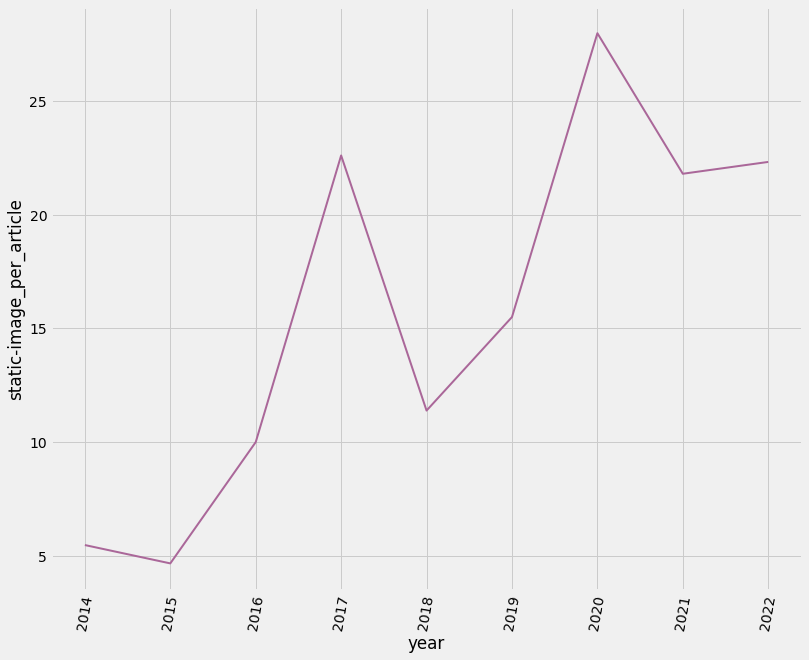

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_modalities, x="year", y="static-image_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

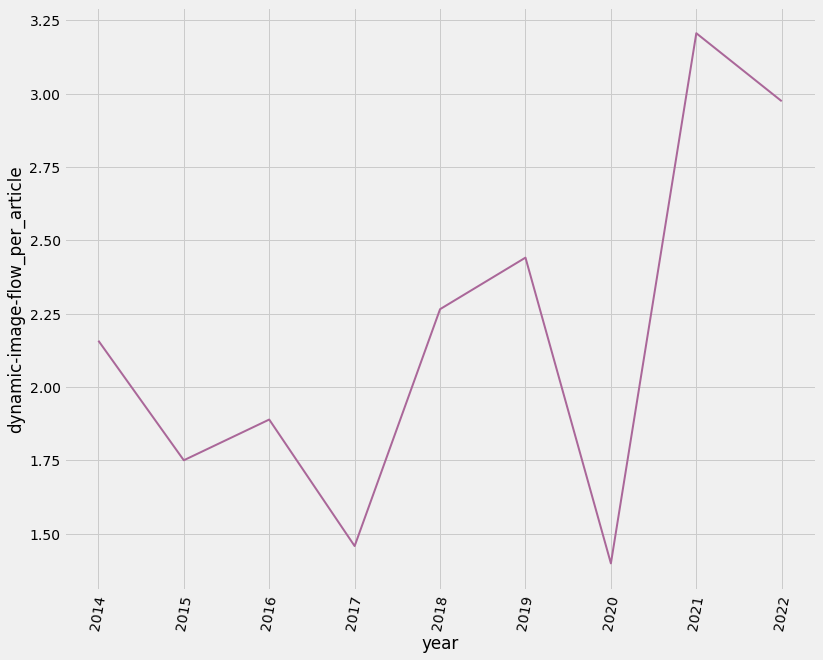

In [8]:

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_modalities, x="year", y="dynamic-image-flow_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

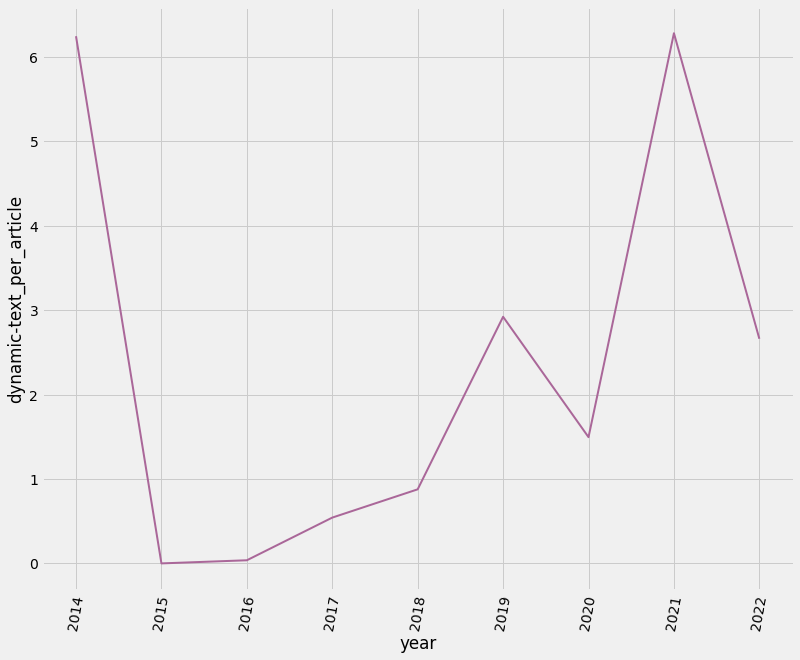

In [9]:

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_modalities, x="year", y="dynamic-text_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

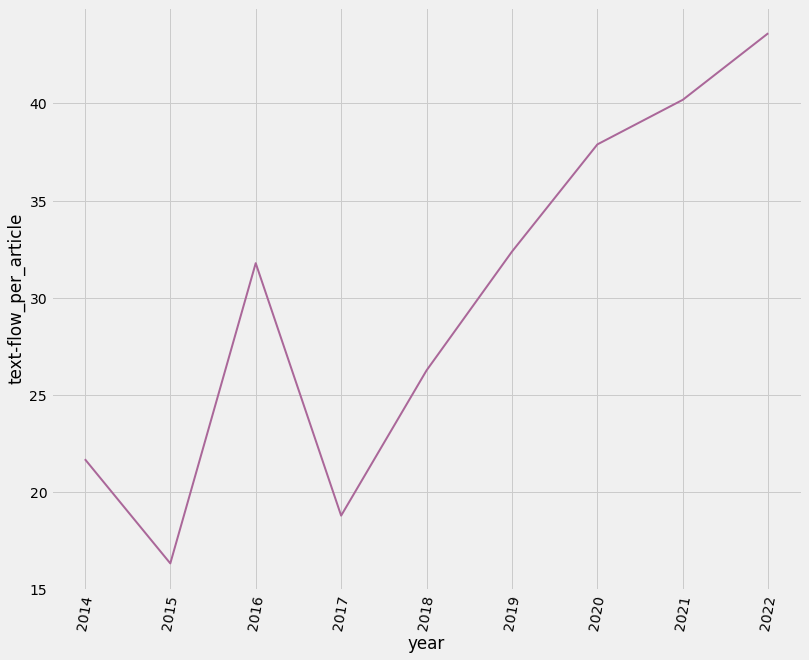

In [10]:

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_modalities, x="year", y="text-flow_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

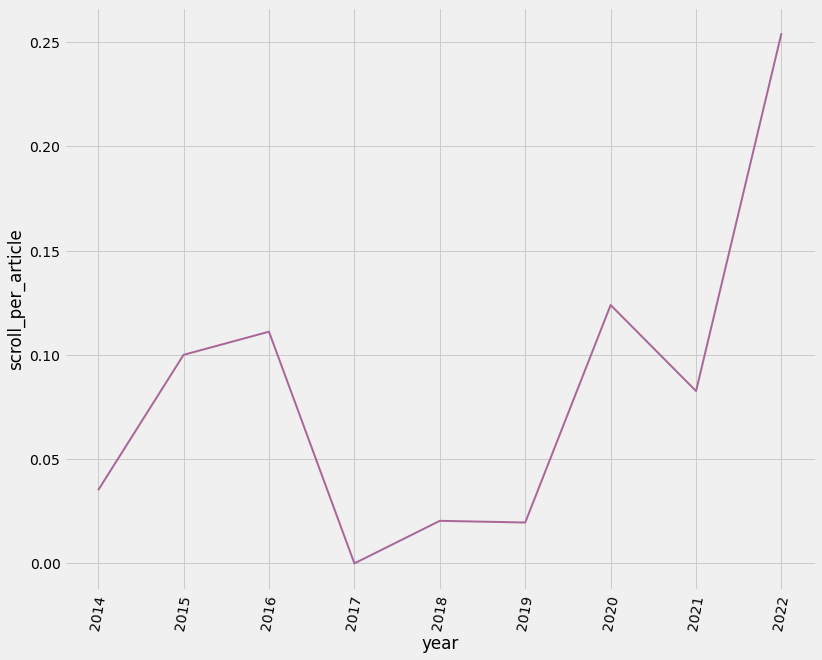

In [17]:

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_modalities, x="year", y="scroll_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()

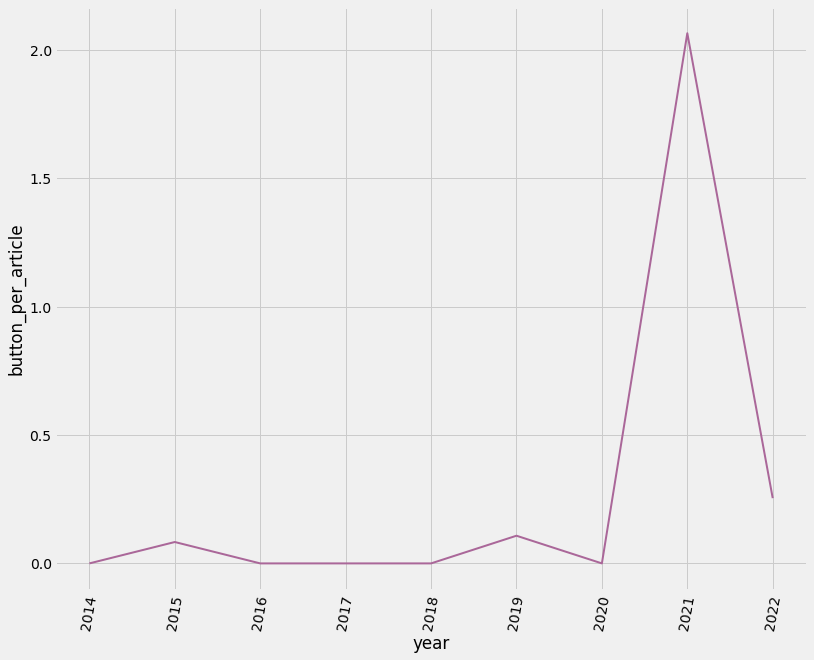

In [16]:

fig = plt.figure( figsize = ( 12, 10))
ax = sns.lineplot(data=df_modalities, x="year", y="button_per_article", 
                  color= '#AA6799', linestyle='solid',linewidth=2 )
plt.xticks(rotation= 80)
plt.show()